In [1]:
%cd /content/drive/MyDrive/SketchData/

/content/drive/MyDrive/SketchData


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
%ls

 full_numpy_bitmap_apple.npy        full_numpy_bitmap_hexagon.npy
 full_numpy_bitmap_banana.npy      'full_numpy_bitmap_ice cream.npy'
 full_numpy_bitmap_bee.npy          full_numpy_bitmap_mouse.npy
 full_numpy_bitmap_bus.npy          full_numpy_bitmap_owl.npy
 full_numpy_bitmap_cake.npy         full_numpy_bitmap_paintbrush.npy
 full_numpy_bitmap_clock.npy        full_numpy_bitmap_pineapple.npy
 full_numpy_bitmap_cup.npy          full_numpy_bitmap_postcard.npy
 full_numpy_bitmap_door.npy         full_numpy_bitmap_radio.npy
 full_numpy_bitmap_elephant.npy     full_numpy_bitmap_scissors.npy
 full_numpy_bitmap_eyeglasses.npy   full_numpy_bitmap_skull.npy
 full_numpy_bitmap_fish.npy         full_numpy_bitmap_snake.npy
 full_numpy_bitmap_flower.npy       full_numpy_bitmap_spoon.npy
 full_numpy_bitmap_guitar.npy       full_numpy_bitmap_strawberry.npy


In [8]:
import os 
import numpy as np 
import matplotlib.pyplot as plt


In [9]:
apple = np.load('full_numpy_bitmap_apple.npy')

In [10]:
apple.shape

(144722, 784)

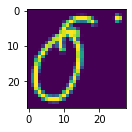

In [11]:
# Exploring the images 
%matplotlib inline
plt.figure()
plt.title('Apple')
from numpy import save
for i in range(1):
  appleImg = np.reshape(apple[i], [28,28])
  # print(appleImg)
  plt.subplot(2,2,i+1)
  plt.imshow(appleImg)
  # save('1.npy', appleImg)

In [12]:
# Get file names and create class labels from the filenames.

file_names = (os.listdir())

def get_classes(file_names):
  '''Get class labels from the .npy data files in the directory'''
  l = list(map(lambda x: (x.split('.')[0]).split('_')[-1], file_names))
  return l 

In [13]:
def create_numeric_mappings(file_names):
  '''
     Creates numerical labels for the class names.

        Parameters:
            file_names: List of directory contents.
          
        Returns:
            class_label_map (dict): class-name to numerical label mapping
            rev_class_label_map (dict): numerical label to class-name mapping
            file_name_label_map (dict): file_name to class_name mapping.
         
  '''
  classes = get_classes(file_names)
  class_label_map = dict()
  rev_class_label_map = dict()

  file_name_label_map = dict()

  for i in range(len(file_names)):
    class_label_map[classes[i]] = i 
    rev_class_label_map[i] = classes[i] 
    file_name_label_map[file_names[i]] = classes[i]
  
  return class_label_map, rev_class_label_map, file_name_label_map 

(class_label_map, rev_class_label_map, file_name_label_map) = create_numeric_mappings(file_names)

In [15]:
def load_as_images(filename):
  '''
    Creates a data set for each class with 5000 images from the huge collection.

    Paramenters:
      filename (str): File name of the class.
    Returns:
      image_data (np.array): 5000 images data rehaped in 28x28 np.array. 
      labels (list of strs): labels of the corresponding class.  
  '''

  data = np.load(filename)  
  labels = []
  image_data = []
  for i in range(5000):
    image_data.append(np.reshape(data[i], [28,28]))
    l = file_name_label_map[filename]
    labels.append(class_label_map[l])

  return image_data, labels

In [16]:
# Concatenating all the image data for all the classes together. 

all_class_images_array = []
y = []

for filename in file_names:
  # if filename == ():
  #   continue
  image_data, labels = load_as_images(filename)
  all_class_images_array.append(image_data)
  y.append(labels)


In [17]:
all_class_images_array = np.asarray(all_class_images_array)
all_class_images_array.shape

(26, 5000, 28, 28)

In [18]:
X = all_class_images_array
y = np.asarray(y)

In [19]:
# 26 classes used, reshape the X and y accordingly. 

X = np.reshape(X, (5000 * 26 ,28,28))
y = np.reshape(y, (5000 * 26))

X.shape, y.shape


((130000, 28, 28), (130000,))

# Model Architecture

In [23]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D
from keras.models import Sequential, load_model
from keras.preprocessing import image


In [21]:
# Shuffle and Split the dataset in train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, shuffle = True)

X_train.shape, X_test.shape

((91000, 28, 28), (39000, 28, 28))

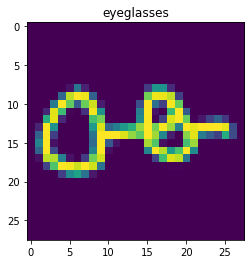

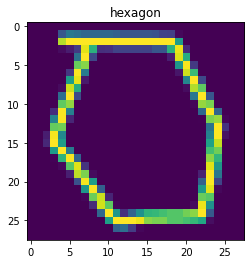

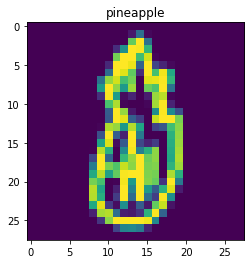

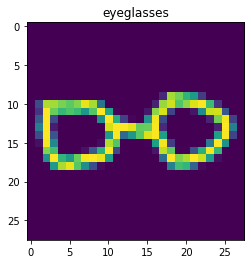

In [39]:
# Checking if any labels went to wrong images 
import random 

for _ in range(0, 4):
  i = random.randint(1, 91000)
  plt.figure()
  plt.title(rev_class_label_map[y_train[i]])
  plt.imshow(X_train[i])

In [24]:
# Define network architecture

model = Sequential()
# Layer 1: Convolutional
model.add(Conv2D(input_shape=(28, 28, 1), filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
# Layer 2: Convolutional
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 3: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

# Layer 4: Convolutional
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 5: Convolutional
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
# Layer 6: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
# Layer 7: Flatten
model.add(Flatten())
# Layer 8: Fully Connected Layer
model.add(Dense(units=1024, activation='relu'))
# Layer 9: Dropout
model.add(Dropout(0.6))
# Layer 10: Fully Connected Layer
model.add(Dense(units=512, activation='relu'))
# Layer 11: Fully Connected Layer
model.add(Dense(units=256, activation='relu'))
# Layer 12: Softmax
model.add(Dense(units=26, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [26]:
# Define the loss functions. 

loss_fn = keras.losses.SparseCategoricalCrossentropy()

model.compile(loss=loss_fn,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Save the model as a .h5 file 

history = model.fit(X_train.reshape(len(X_train),28,28,1), y_train, validation_data=(X_test.reshape(*X_test.shape,1),y_test), epochs = 5, batch_size=64)
model.save('/content/drive/MyDrive/SketchModels/v6.h5')

Epoch 1/5
1422/1422 [==============================] - 36s 25ms/step - loss: 1.0874 - accuracy: 0.6954 - val_loss: 0.6141 - val_accuracy: 0.8291
Epoch 2/5
1422/1422 [==============================] - 35s 25ms/step - loss: 0.6279 - accuracy: 0.8242 - val_loss: 0.5015 - val_accuracy: 0.8617
Epoch 3/5
1422/1422 [==============================] - 35s 25ms/step - loss: 0.5299 - accuracy: 0.8526 - val_loss: 0.4768 - val_accuracy: 0.8712
Epoch 4/5
1422/1422 [==============================] - 36s 25ms/step - loss: 0.4698 - accuracy: 0.8696 - val_loss: 0.4403 - val_accuracy: 0.8807
Epoch 5/5
1422/1422 [==============================] - 36s 26ms/step - loss: 0.4251 - accuracy: 0.8817 - val_loss: 0.4498 - val_accuracy: 0.8775


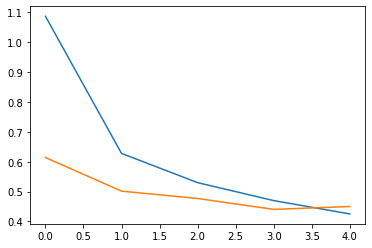

In [ ]:
history.history['loss']
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
y_pred = model.predict(X_test.reshape((len(X_test),28,28,1)))
# import numpy as np
predict_class = np.argmax(y_pred, axis=1)
predict_class

array([11, 25,  9, ...,  5, 16, 14])

In [ ]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict_class)


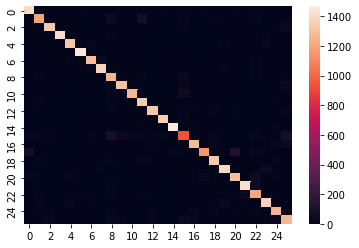

In [ ]:
import seaborn as sns 
sns.heatmap(cm)

<h1> Image Processing

In [27]:
# base64 encoded image coming from the user-browser request. 

b64 = '''data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPoAAAD6CAYAAACI7Fo9AAAAAXNSR0IArs4c6QAAG9NJREFUeF7tXXesFcUXHor0jgiK9CIgvSgggkhRVEAIEcQYqhSRCAGUIP5hlIQoCiGiCNKiEASlRulVQJqAdJGidGmCIL388m28/t67d/fuzL699+7sfJMQ4L3ZmTPfOd/O7JkzZzLdu3fvnmAhAkQg1AhkItFDrV8OjghYCJDoNAQiYAACJLoBSuYQiQCJThsgAgYgQKIboGQOkQiQ6LQBImAAAiS6AUrmEIkAiU4bIAIGIECiG6BkDpEIkOi0ASJgAAIkugFK5hCJAIlOGyACBiBAohugZA6RCJDotAEiYAACJLoBSuYQiQCJThsgAgYgQKIboGQOkQiQ6LQBImAAAiS6AUrmEIkAiU4bIAIGIECiG6BkDpEIkOi0ASJgAAIkugFK5hCJAIlOGyACBiBAohugZA6RCJDotAEiYAACJLoBSuYQiQCJThsgAgYgQKIboGQOkQiQ6LQBImAAAiS6AUrmEIkAiU4bIAIGIECiG6BkDpEIkOi0ASJgAAIkugFK5hCJAIlOGyACBiBAohugZA6RCJDotAEiYAACJLoBSuYQiQCJThsgAgYgQKIboGQOkQiQ6LQBImAAAiS6AUrmEIkAiU4bIAIGIECiG6BkDpEIkOi0ASJgAAIkugFK5hCJAIlOGyACBiBAohugZA6RCJDotAEiYAACJLoBSuYQiQCJThsgAgYgQKIboGQOkQiQ6LQBImAAAiS6AUrmEIkAiU4bIAIGIECiG6BkDpEIkOi0ASJgAAIkesiVvH79etG9e3fx119/iYcfftj6+/LlyyJv3ryiYsWKYvTo0aJKlSohR4HDI9FDZANbtmwRvXv3FocPHxaZMmUS2bJlE2fOnIk7wixZsoidO3eS7CGyA7uhkOghUfCECRNEnz59xL1795RH1KRJE7F69Wrl5/iAPgiQ6ProylHSn376STzxxBOeSI5Gc+bMKa5evRoCJDgEJwRIdM1tY+/evaJhw4bi0qVLGRrJlClTRNeuXTPUBh8OLgIkenB1E1cyELxfv35izZo10jM5vtuLFSsmTp06FdM2ia6pIUiKTaJLAhWkaiB59erVxZ07dxzFyp8/v8iXL5+Asw1/ypUr95+HfeXKlaJDhw6WBx6lRo0aYseOHUEaImXxGQES3WdAk9HcM888I5YuXerYVf369QW+2+OVixcvijFjxlhVBgwYIAoUKJAM0dlHihAg0VMEfEa6xX74iRMnHJv45ZdfrBmfhQhEECDRNbIFzOKYfffv3+/4Xf7JJ5+IgQMHajQqipoMBEj0ZKDsQx8IaqlVq5a4e/eubWvYIlu2bJm1zcZCBKIRINE1sYkGDRqIjRs32kqbOXNm63f16tXTZDQUM9kIkOjJRlyxP3jYu3XrJjZv3mz7JLbMZsyYITp16qTYMqubhACJHmBtu22jkeQBVl7ARCPRA6aQtOK0bNnS+u62K7lz5xarVq3icj3A+guSaCR6kLSRRhbM5vjmtotBx0yO46f4bmchAjIIkOgyKCW5jtuSfdSoUWLQoEFJlord6YwAiR5A7cWLfMNx1Ndeey2AUlOkICNAogdQO+XLlxeHDh2KkQx75OvWrQugxBQp6AiQ6AHUUPHixcXJkydjJGNoawCVpYlIJHrAFIV0UI8//nhMiOv9998vzp49GzBpKY4uCJDoAdMUDqPs2rUrRqrHHntMbNq0KWDSUhxdECDRA6SptWvXiqZNm9rGsyMyjiGuAVKWZqKQ6C4Kw1L6jTfesI6FIqtqqVKlxKOPPip+++03cfPmTetp/LxChQrWz1Dw759//tl6Bv8eO3as9Uy8gn6wL26XTMIpK4xmtkZxU4gAie4A/p49e6x86CCgl8yq0c1iST5+/HjHIJfatWuL7du320qzZMkSgSg5FiLgFQESPQ1yCFTBee9ff/1VHD161Cumjs8hog1k79WrV0wdZHiJTvCI+vPmzRNt2rTxXRY2aBYCJPq/+gbJq1Wr5nje20+z+Oabb8RLL72UrsmCBQsKpHdKW0D+SF43P/tnW+YhQKL/q/N4B0j8NgvM1Lt37053O0rJkiXFsWPH0nVVokSJhKws7MaDFx18EUhwgQJ5Itc35cqVS2TNmtX6hCldurRAdB58Dyz6IGA80WHgQ4cOFcuXLxfXrl2Lu+xGIAui1mSccSAyotuOHz9u22adOnXE1q1b//tdmTJlxO+//56uLkh15MiRhFkTnIfI5Q4MolcT8TrFi6ps2bLWM8h4kydPHivTLAp+xxdCwlTmuWGjiQ4DR6rj27dvOwJYtGhRa3YbN26cp+0thK1u2LAhpv3oE2jJInpkFwEvFbd72Txb1b8PIvMN/BHvvfeeeOCBBzLaHJ/PAAJGE90tbfL8+fMz7AjDy6Rq1aq2nnusDDDzoySD6BhP+/btk+KHSGuTOXLksM7OIw01S2oQMJro8dIm+3mAZNasWVaqJ7ttupkzZ4qOHTsmjOh40SArLDLHwgfgx1ahF1ON3BJz/fp1UahQITF9+nQr1JclOQgYS/SpU6daudjsCpac2NP2Mzc6tsnatWsX0x36QnANttD8dsbJfJokx8zse5kzZ44tJqmUKax9G0d0t9zocCx99913CQlQwRIegTjRpVGjRmLfvn3i/Pnz6X5VuHBhce7cOU+2B5LjOmSvz2O1A68/IvXgEMT1TnBG/vjjj76tCjDLY3bHS/eFF17wNE4+JIeAUUR3y40Ow8PBkUTFlDtdb4z98rx58/o2o8f7VHAzC4ThgngVK1a0rQpPPbbhrly5IvDtnTbPPEKC//zzT+t3+FulMKGGClrqdY0iOmZO5FqzK8nKqPrpp5+K/v37x4iAePbTp0+n+7mXfXQ43PCJoPotjv6RGx6x/H4UrFzwaYQtRBlZgD+2HJG6mnv0fmggfRtGEB1bSr1793aMJYeRTZ48OWn3g9tFwSEgJXqbT3XpPm3aNItcMsRKawbwE+Aq5URsgWEFgC02bOfdunXLSqgRTz7IMnfu3AzvdvhPFb1bDD3R3baUYFjwACfzAoQWLVpYATpuRXZGx/c48sjZ7de79YHxz54929p2S0bBlc3NmzePS3a8eHHv+5NPPpkMkYzoI9REx0yOvVun+8rwjYkz4In6JneyIGx1YQ/dSa7IczKRcW4ZY51kwNgbN24s8CmR7KXy4sWLxXPPPedKdsj32WefpQsVNoKVCRhkqIke75scWGJmjXfPeALw/q9J3HrqlrJZhuhuY3QaQyrHDpnwgurZs6flF4i3lMcnDXLlValSJZHqCH3boSY6ZqqDBw/aKhGx2fDCp9KA4Hzatm2bo5G5ET1e1F08yw3C2CPy4Ru+S5cuAjsSTgU7AV4+S0LPXoUBhpboTgEx2bNnt/bIR44cmVKSQ0dYwrZq1coT0UHyp556yjFhZORwSXTj2LfGXngqX3B2A4ZM2Pe3m90xFuxIJMJZqMAVrauGkugIK+3cubOt0bjNksnWJgJ0/vnnH9tunZxxbt/laBN72XaldevWYsGCBckeplR/kKtt27a2dYsUKWI5MP2MVpQSKiSVQkd0Nwdc0NIy4cXzxx9/2JoTtuEuXLgQ8zu3wzjYlouOskMjQVqyO/EHAUtOh1+wQ7Bo0aKERC2GhM+OwwgV0eFYwzaR0wz5xRdf2KZxSqWSmzVrJrDlZFec9tEfeeQRceDAAdtn7PbjURFedsTUB23JbjcIBO84Rdbxe92btYaG6G7hrVOmTElaQIyKKuBkwkk5u1KpUiUrBj66YGsOy3eVolNeeITw4kSfXcGJN3jqWdQQCA3R8aZ3MgDMYnaHSdSgSlzt4cOHixEjRsR0gFk4bdYbkBuZaZHjPdpp5eR8Q6OJjuFPBDIImMEWIKLp0haE6EZn4klE/2FrMxREx4EIhLjaFXzX4QWQ7KAYVUO57777YkJgsQyPGPrChQstR5VqeGu8zLOqMia7Przs0ddQMWGmNy1oT/SJEyc6fneD5Djz7OTJ9QZZYp7Knz+/+Pvvv9M1jqSM8Dd43S/HSubLL790zCWfmJH41ypO0EUuxYi0yq02b/hqTXSnCwkBRe7cua30RUGbyUG8wYMHW7N3zZo1rYyqICTOe1++fDlGizi+iq0y1Zk86J8rMub64osvCpxViC5wYMqcFZDpw5Q6WhM9XvgnnFz4bg9SgdHCeNMWzFBYdbz88ssCaZb8KNGJJ/1oMxVtIHklPPB2/ojodNmpkE+nPrUmutM1RnBsDRs2LHB6QEZZu8yrICbub7tx44YvMgdxG9HrwBA0ZJcyO8iBP17HmsjntCa6nac9yEtWhJ863bwSL5pNxQAQ+ovY8bAUp+AghP/i04xFDgGtiY7LFHBJQtpSrlw5x4MscpAkrha+z3Fu3K5gtldNvxT9CYDsLMk8V584pP7fspMjsmHDho7ZgpIhl259kOhJ1pjdlhFEwPIdl0ns2LHDk0SVK1dWDqLx1FEKHrK7rirIL/QUQOTapdZEt7sFJehvekR2IeDFrkQOuKh62MMeA263cpPNvuPKAEMqkOhJVrTboRscPEGKZdmCAyBwvoX5VJfdC93uokpZzEyspzXR7Q53IMgC95sHudgtRaO/t/F/t5kdeeJ37doV5KH6IlvTpk3F6tWrY9pCXgGcRmRxR0Brouu4dIdKvBxKiValLqG97iboXgO32CAEOLro8FJ3H11yapDoycE5XS/ILY9gH69Fp9Ber2NM+xw97xlHUWui67a9llZdIDuWnlevXlXSIg6/4NmghfYqDcJDZRyzhX8jbeFeujyQJLo8Vr7XdEsJZdch0i0hKsy0gt2U6ASSTz/9tFixYoVpUHgar9ZEt3PS6PaWj1y+gJTGuLsMh13gUcZZ9MgRVXjicbhl0qRJRpIclm3njyHR5TmvNdFx2d+4cePSjbZfv37WpQQs4ULA7iQbogmj76sL16j9G43WRLeLg+aWi3/GEaSWkO+ubt26MSJhJRTmGAK/dKA10cOwdPdLkSa0Yxc+DBtwSq5pAiayY9Sa6Lruo8sqh/XSI4DroOfNm5fuh/BnIEAq2ffH6aYbrYmua2ScbkYSFHmR/75MmTIxEYNIFRb9AgiKzEGRQ2uic+keFDNKnhx2OQh022lJHlr/70lrovfo0UNMnjw5HW5Ih4xtKJZwIgD9Ikd/2tK3b1/remUWZwS0JjqX7uaZtt0q7tlnn7WuamIJKdHtrkVGWGx0imAaQHgQ4H66N11qPaPbZYGFJ37dunXe0OBTgUeA++neVKQ10emM86Z03Z/ifrq6BrUmOvfR1RUehie4n66uRa2JTmecusLD8AT309W1qDXRuXRXV3hYnuB+upomtSY699HVlB2m2m+++aYYO3ZsuiH16tXLSpTJEouA1kTn0t1ck+bJRTXda030SpUqxWR8Bfn379+vhgJra4cAia6mMq2J/sorrwhcQ5S2dO7cWUyfPl0NBdbWDgEmHVFTmdZE1zk5pJqaWDsaAc7oajahNdHtAieKFCliezWxGiysHXQESHQ1DWlNdLt7zJAWeNOmTWoosLZ2CHDprqYyrYnOfXQ1ZYepNmd0NW2S6Gp4sXZAECDR1RRBoqvhxdoBQeCtt94SH330UTpphgwZIj788MOASBgsMbQmerNmzWIygObLl0/MnTtXILk/S3gRINHVdBs6omP4yAyK63vgrGMJJwJcuqvpVWui2yk7Mnx639UMQbfaJLqaxrQmOrKNgNB37961HfXu3butu8hZwocAt9fUdKo10TFU5IfDqaXVq1fHjJxJA9WMQafanNHVtKU90SPDrVatmsAMnrbUqFFD7NixQw0R1tYCARJdTU2hIXrNmjUFLtxLW6pWrSp27dqlhghra4EAve5qagoN0Vu1aiUWL14cM3rc4jFhwgTezaVmF4GvTaKrqSg0RN+zZ4/ADG5XMmfOLDZv3izq1Kmjhg5rBxYBLt3VVBMaomPYdodcInA0adLE1mGnBhdrBwUBEl1NE6EiOk6tIWngvXv3YlAoWbKkQPZQlnAgYJczrkuXLmLq1KnhGKDPowgV0YHNypUrRfv27cWlS5dioOK+us/Wk8Lm7HwyvFXVWSGhIzqG6vS9zmi5FDLT564ffPBBcfr06XSt8p50g4h+5swZMWrUKDFmzBhx69atdCNHDPzy5ct54MVn0iW7Oaf717Zu3UqHq4MyQjWjg+S1atUSJ0+edLQ9eOBPnTolkIaKRU8E7G5ULVasmKVXFnsEQkX0jz/+WAwePNhV18hMg295Fj0R4B3p6nozkuhYws+fP1+0bt1aHTE+kXIEunbtKqZNm5ZODnyzL1iwQNStWzfl8gVRgFARXWbpnlYJX3/9tUBueBa9EHA6npw1a1YrDwHJHqvPUBEdw4s448aNGyeuXr0a14Ixs3///fcCWzUs+iBgt3SPSI+rtNetW6fPYJIkaeiIHsFt586dAgdd7IJn0mILsn/77bfW3juLHgjgVCL0a1dIdAOccdFDnDhxoujdu7cr2emJ14PgkBLHjnFmwS7ZCPSI6Egu3Q1YukcPce/evaJfv35izZo1cQmP7bZVq1aJKlWq6GP1hkk6a9Ys0alTJ0c9zpw5U3Ts2NEwVOSGG9qle/Twsb/uloQCzhycaSfZ5YwnmbW2bNliHVpy+hTLnTu3uHLlSjJF0qovY4gez4GTVmOFCxcWiLwqVaqUVooMu7C1a9cW27dvdxxm6dKlxZEjR8IOg+fxGUP0Nm3aiIULF0oD9f7774vhw4dL12fFxCCAT6+hQ4eKH374Qdy5c8exEx5oiY+/MUSHwcBbe/v2bWmLhGcXuehYUoOArM6YWMRdP8YQHVDAcAYOHCiWLVvm6olHfXz34caXkSNH8rvd3ZZ8ryGzCmvUqJGYPHkyU4W5oG8U0SNYgLzwsMsWBtbIIuVvPZB4/fr1jo0+9NBD4sSJE/52GtLWjCQ6oucQG+108YOdrkH2efPmCcwyLMlBoGjRolako1PZuHEjr92SVIWRRAc2OL3WvHlzqSV8BEueZ5e0Kh+quW2n1atXz0r4ySKHgLFEBzw47dSuXTvlmX3Dhg2ifv36cgizlicESpQoIY4fP277LJxv2GqrXr26p7ZNfMhookPhuNIJ3vhr165J65/x8dJQKVfETI7EEk7JQ+AgxYuWJFeD1niiA64lS5YI3NOmUhgfr4KWXF3kCMDhIiffCV6wiGXHsp1FDQES/V+85syZI3BDp0o6IkbRqRlbvNqYyfE5FM9B+sEHH4h33nnHv04NaolEj1L2+PHjRd++fZVMoFChQtZSklc/KcFmVUZsw6BBg6zLNa5fv+7YQIUKFcSBAwfUO+ATFgIkuo0h4Bjktm3blE0ES8vKlSuL0aNHi5YtWyo/78cDkaCgw4cPW1GAiAEP6gsIsuIFGS+0FZjgMwmXZfKwkXcLIdFtsENeeBigyj572mZS5RV2ChmFPHPnzg1cDIDTxZhpscyTJ4/1XU6Seyc5Z/Q42GEpicMU2bJls7zyBw8eFMgbfu7cOSnEQS4Yaf78+a36SGuVK1cukSVLlv+exwoAxy6dZt2lS5eKt99+29pmgre5ePHiVpsNGza0Pi9whh6RY927dxfnz5+3+oi3e/D555+LPn36SMmf6Er4Jkfk282bNx27ovPNPy1wRlfEEgddOnToYG3L+V3gTZ4+fboVt41+cIbeaVUBkuP8fLwc9nbyBeGgDhJEICmn24oJGYJ69uzpN8xGtkeie1T7V199JXr06BFzG4zH5tI9VqBAAcsxFc855bWfVDu1cAkiViDxcvlh5QJ8kUOAxR8ESPQM4jh79mwrfZFbEsoMduPr4+XKlbNWDsjYkswiQ/Ly5csnZLWUzHEGsS8S3Qet4DpmRHO5paryoSulJiI+AKeHQDxcNZyMIkNyyAHHGy7DZPEXARLdRzynTJkievXqJZXcAiQsWLCguHDhgo8SqDeFuAFkyk1kwa0q3bp1c131IBf/66+/nkhRjG2bRPdZ9ZiRGjRo4GrU6DZ79uwCudDgULt48aLtne4+i2fbHLau8AmSiC2seOmZI8LgpTdjxgwrwytLYhAg0ROAK47AItoLGWVlvt1h6EhZVbFiRbFo0SJx48YNgZ9FX/ucAFH/azJR99G5JXWEAHjBIHaBJXEIkOiJw9ZyKg0YMMAK3Tx69GjcPeMEiiHdNMi+e/duX2Z2BO/079/f9dZaxBsggQQPqkiryVNFEt0TbOoPYZZv0aKF696xesvCmv0RmJM3b14rIAd/kJ0FBZ8Fly5dssJIUQcpkeOtMnLkyCGQURVXUHtdyquEtuIwUdu2bb0Mm88oIECiK4CV0aqY4YcMGSIQFaYa6BLdd86cOQVypmGrDLH1sqSEDLiTTuYCSq9XS8uEtuKFsnbtWs7kGTUqyedJdEmg/K4G59Orr77qaYbPaCw9LqjAFpZbZBpWCmXLlrXuIsflhTIFYbvPP/+8684Dzv/DH8GSHARI9OTgbNsLZldsxx07dsy6GQYn3/AzxH9jxj106JBFRsS3g9z4gzPwI0aMyPDpOPQDR5nsNUa4itiN7AhZxXjcCj4tEIoruwpxa4+/d0eARHfHKLQ1MLPDCSa7MwCCIr4eS/9JkyalI6pMQAxWCIjGi342tAAHaGAkeoCUkQpRMLNjpj579qxS9yAtViHYEmzcuLF49913474w8IJYsWKFVZcl+QiQ6MnHPHA9yl59lBHBeaVxRtDL+LMkesYxDEULIDtmW5xr97uMHTvW2lNnSR0CJHrqsA9cz1jGw0GmchGl2yAQ/9+1a1e3avx9ghEg0RMMsG7Nw0E3bNgwK5POvn37rB2AyCk4t9xu0WOF4w1RbyypR4BET70OtJEAnnWksJJJiMEttGCplUQPlj60kAZLfJw0ixzawYwPrzr2+BGxpxqtp8WgNReSRNdcgRSfCMggQKLLoMQ6REBzBEh0zRVI8YmADAIkugxKrEMENEeARNdcgRSfCMggQKLLoMQ6REBzBEh0zRVI8YmADAIkugxKrEMENEeARNdcgRSfCMggQKLLoMQ6REBzBEh0zRVI8YmADAIkugxKrEMENEeARNdcgRSfCMggQKLLoMQ6REBzBEh0zRVI8YmADAIkugxKrEMENEeARNdcgRSfCMggQKLLoMQ6REBzBEh0zRVI8YmADAIkugxKrEMENEeARNdcgRSfCMggQKLLoMQ6REBzBEh0zRVI8YmADAIkugxKrEMENEeARNdcgRSfCMggQKLLoMQ6REBzBEh0zRVI8YmADAIkugxKrEMENEeARNdcgRSfCMggQKLLoMQ6REBzBEh0zRVI8YmADAIkugxKrEMENEeARNdcgRSfCMggQKLLoMQ6REBzBEh0zRVI8YmADAIkugxKrEMENEeARNdcgRSfCMggQKLLoMQ6REBzBEh0zRVI8YmADAIkugxKrEMENEeARNdcgRSfCMggQKLLoMQ6REBzBEh0zRVI8YmADAIkugxKrEMENEeARNdcgRSfCMggQKLLoMQ6REBzBP4HM+uV5b617pgAAAAASUVORK5CYII='''

In [28]:
import cv2 
import re, base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt 

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=250x250 at 0x7F67666446D0>


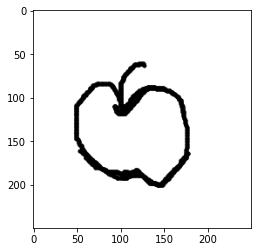

In [29]:

# Load image from BytesIO
im = Image.open(BytesIO(base64.b64decode(re.search(r'base64,(.*)', b64).group(1))))

# Display image
plt.imshow(im)

print(im)
# im.save('result.png')

In [30]:
from google.colab.patches import cv2_imshow
# cv2_imshow(imgarr)

def performImageProcessing(PIL_image):
  '''
    Performs grayscaling, thresholding and then finds contours in the image 
    using OpenCV and then creates a bounding box around the doodle.

    Parameters:
      PIL_image (PIL Image): input image.
    Returns:
      img_resized (np.array): properly reshaped np.array.
  '''
  imgarr = np.array(PIL_image)


  gray = cv2.cvtColor(imgarr, cv2.COLOR_BGR2GRAY)
  # cv2_imshow(gray)
  ret, binary = cv2.threshold(gray, 100, 255, 
    cv2.THRESH_OTSU)
  # cv2_imshow(binary)
  inverted_binary = ~binary

  # cv2_imshow(inverted_binary)

  contours, hierarchy = cv2.findContours(inverted_binary,
    cv2.RETR_TREE,
    cv2.CHAIN_APPROX_SIMPLE)

  # first_contour = cv2.drawContours(imgarr, contours, 0,(255,0,255),3)
  # cv2_imshow(contours[0])
  for c in contours:
    x, y, w, h = cv2.boundingRect(contours[0])
    # first_contour = cv2.rectangle(first_contour,(x,y), (x+w+5,y+h+5), (255,150,0), 5)

  imfinal = gray[y:y+h,x:x+w]
  img_resized = cv2.resize(imfinal, (28, 28))
  return img_resized

new = performImageProcessing(im)

cv2_imshow(new)

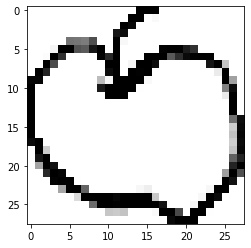

In [34]:
plt.imshow(new,  cmap='gray', vmin=0, vmax=255)
new = np.array(new)


<h1> Predictions on the saved model.

In [36]:
# Predictions on the model

from tensorflow.keras.models import load_model

# Load the relevant model

model = load_model('/content/drive/MyDrive/SketchModels/v5.h5', compile = False)


In [37]:
# Carry out predictions on the image. 255-new because the colourmap in image
# needs to be inverted.

preds = model.predict((255-new).reshape(1,28,28,1))
predict_class = np.argmax(preds, axis=1)

In [38]:
# Map the numerical label to the class name. 

rev_class_map[predict_class[0]]

'apple'